### Dependencies

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

/Users/chasekregor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Creating SQLite Database

In [2]:
conn = sqlite3.connect(r"ml-20m.db")

uncommment cells below inorder to make the actual database, uncomment before final commit for reproducibility. You comment them out so that way each time you run the notebook you arent making the database again. 

In [3]:
#genomescores = pd.read_csv("ml-20m/genome-scores.csv")
#genomescores.head()

In [4]:
#genomescores.to_sql("genomescores", conn, if_exists="replace")

In [5]:
#genometags = pd.read_csv("ml-20m/genome-tags.csv")
#genometags.head()

In [6]:
#genometags.to_sql("genometags", conn, if_exists="replace")

In [7]:
#links = pd.read_csv("ml-20m/links.csv")
#links.head()

In [8]:
#links.to_sql("links", conn, if_exists="replace")

In [9]:
#movies = pd.read_csv("ml-20m/movies.csv")
#movies.head()

In [10]:
#movies.to_sql("movies", conn, if_exists="replace")

In [11]:
#ratings = pd.read_csv("ml-20m/ratings.csv")
#ratings.head()

In [12]:
#ratings.to_sql("ratings", conn, if_exists="replace")

In [13]:
#tags = pd.read_csv("ml-20m/tags.csv")
#tags.head()

In [14]:
#tags.to_sql("tags", conn, if_exists="replace")

### Querying, Loading, and Cleaning Data

In [15]:
model = pd.read_sql_query("""SELECT userId, 
movieid,
rating,
title as titles


FROM ratings INNER JOIN movies USING (movieId)



ORDER BY userId ASC


LIMIT 500000;""", conn)

In [16]:
model.head(10)

,userId,movieId,rating,titles
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
5,1,112,3.5,Rumble in the Bronx (Hont faan kui) (1995)
6,1,151,4.0,Rob Roy (1995)
7,1,223,4.0,Clerks (1994)
8,1,253,4.0,Interview with the Vampire: The Vampire Chroni...
9,1,260,4.0,Star Wars: Episode IV - A New Hope (1977)


In [17]:
#modelb = pd.read_csv('data/100k.csv')
#modelb.head(10)

In [18]:
#modelb = modelb.astype(float)

In [19]:
model = model.pivot_table(index = ['userId'], columns='titles', values = 'rating')

In [20]:
model = model.reset_index()
model.head(10)

titles,userId,"""Great Performances"" Cats (1998)",$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...,Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),[REC]² (2009),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for column in model:
    model[column].fillna((model[column].mean()), inplace=True)
    
#modelb = modelb.fillna(2.5)
model.head(10)

titles,userId,"""Great Performances"" Cats (1998)",$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...,Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),[REC]² (2009),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
1,2,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
2,3,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
3,4,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
4,5,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
5,6,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
6,7,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,2.000000,3.333333
7,8,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
8,9,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
9,10,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333


In [22]:
model = model.drop(columns=['userId'])

In [23]:
model.head(15)

titles,"""Great Performances"" Cats (1998)",$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),[REC]² (2009),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
1,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
2,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
3,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
4,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
5,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
6,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,2.000000,3.333333
7,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
8,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
9,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333


### Building Machine Learning Model

In [24]:
test, train = np.split(model, [int(.2*len(model))])
train.head(10)

titles,"""Great Performances"" Cats (1998)",$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),[REC]² (2009),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
674,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
675,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
676,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
677,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
678,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
679,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
680,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
681,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
682,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333
683,3.0,3.0,3.333333,3.5,3.666667,2.625,2.727273,3.089744,3.642857,3.728682,...,3.5,3.5,3.833333,3.25,3.364583,5.0,2.979592,2.5,3.044521,3.333333


#### DO NOT RUN CELL BELOW UNLESS YOU HAVE SOME TIME, TAKES AROUND 3 HOURS TO RUN

In [25]:

#kmeans = KMeans(n_clusters=18, random_state=0).fit(modelb)

Nc = range(1, 2000, 500)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = []

for i in range(len(Nc)):
    #comment out line directly below to speed up
    #print(kmeans[i].fit(model).score(model))
    score.append(kmeans[i].fit(model).score(model))
    print("Running cluster #:",i)
    
print(" ")
print("DONE!")

Running cluster #: 0
Running cluster #: 1
Running cluster #: 2
Running cluster #: 3
 
DONE!


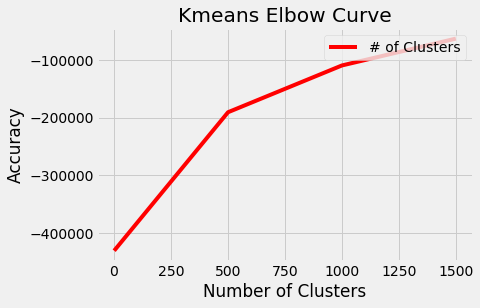

In [26]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')


plt.plot(Nc, score, 'r-')

plt.legend(['# of Clusters','Accuracy'], loc = 'upper right')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Kmeans Elbow Curve')

plt.show()

#fig.savefig('images/kmeanselbow.png')


### Setting Number of Clusters

In [ ]:
#not sure why I would have the random state. Ask Dr. Paul about that
#kmeans = KMeans(n_clusters=18).fit(modelb)
kmeans = KMeans(n_clusters=2000, random_state=0).fit(model)

In [ ]:
modelsize = len(model.columns)
modelsize

### Creating a Fake User with Fake Ratings

In [29]:
#creates a fake user with random ratings
userratings = np.random.randint(low = 0, high = 5, size=modelsize)
userratings = [userratings]
userratings

[array([0, 1, 2, ..., 1, 2, 2])]

In [52]:
#predict's what cluster our fake user is in
userscluster = kmeans.predict(userratings)
userscluster = userscluster[0]
userscluster

2

In [53]:
prediction = kmeans.cluster_centers_[userscluster]
prediction

array([5.        , 3.5       , 4.        , 3.        , 3.5       ,
       4.        , 4.        , 5.        , 3.        , 3.        ,
       4.        , 4.        , 3.5       , 5.        , 4.        ,
       4.        , 3.        , 3.        , 3.        , 4.        ,
       5.        , 4.        , 5.        , 5.        , 4.        ,
       3.5       , 5.        , 3.        , 3.        , 4.        ,
       4.        , 3.5       , 5.        , 3.        , 3.        ,
       4.        , 3.        , 3.        , 5.        , 4.        ,
       4.        , 5.        , 3.        , 4.        , 4.        ,
       3.5       , 4.        , 5.        , 4.        , 4.        ,
       4.        , 5.        , 5.        , 5.        , 5.        ,
       4.        , 3.5       , 4.        , 4.        , 4.        ,
       3.5       , 3.        , 4.        , 4.        , 3.5       ,
       3.5       , 3.5       , 4.        , 4.        , 4.        ,
       5.        , 4.        , 4.        , 3.        , 3.     

In [54]:
sort_index = np.argsort(prediction)
top20 = sort_index[-21:-1]
top20

array([332, 368, 202, 268,  70, 359, 148, 273,  78,  54,  79, 351, 194,
        83, 346,  84, 342, 278, 333, 353])

In [55]:
movietitles = model.columns
movietitles

Index(['1984 (Nineteen Eighty-Four) (1984)', '2001: A Space Odyssey (1968)',
       '2010: The Year We Make Contact (1984)', '28 Days (2000)',
       '28 Days Later (2002)', '7th Voyage of Sinbad, The (1958)',
       '8MM (1999)', 'Abbott and Costello Meet Frankenstein (1948)',
       'Abyss, The (1989)', 'Ace Ventura: When Nature Calls (1995)',
       ...
       'Willy Wonka & the Chocolate Factory (1971)',
       'Witches of Eastwick, The (1987)', 'Witches, The (1990)',
       'Witness (1985)', 'Wizard of Oz, The (1939)',
       'X-Files: Fight the Future, The (1998)', 'X2: X-Men United (2003)',
       'Yellow Submarine (1968)', 'Yojimbo (1961)',
       'Young Frankenstein (1974)'],
      dtype='object', name='titles', length=415)

### Fake User's Top 20 Recomendations

In [56]:
for i in top20:
    print(movietitles[i])

Soylent Green (1973)
Time Machine, The (1960)
Kids (1995)
Philadelphia (1993)
Clockwork Orange, A (1971)
Swingers (1996)
Glory (1989)
Planet of the Apes (1968)
Cool Hand Luke (1967)
Bonnie and Clyde (1967)
Creature from the Black Lagoon, The (1954)
Star Wars: Episode VI - Return of the Jedi (1983)
It's a Wonderful Life (1946)
Dances with Wolves (1990)
Star Trek: First Contact (1996)
Dark City (1998)
Star Trek III: The Search for Spock (1984)
Princess Bride, The (1987)
Spaceballs (1987)
Starship Troopers (1997)


### Saving The Model Using Pickle

In [57]:
with open('flask-app/kmeans.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid,2)  

In [58]:
"""#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = model

index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('flask-app/cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) """

"#Save a dictionary of the index keys to make the dummy variables out of user input\n\n#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column\ncat = model\n\nindex_dict = dict(zip(cat.columns,range(cat.shape[1])))\n\n#Save the index_dict into disk\nwith open('flask-app/cat', 'wb') as fid:\n    pickle.dump(index_dict, fid,2) "

### Saving the Title & Average of Every Movie

In [59]:
movies = list(zip())

for column in model:
    i = {'title':column, 'average':model[column].mean()}
    movies.append(dict(i))

In [60]:
movies[0:10]

[{'average': 5.0, 'title': '1984 (Nineteen Eighty-Four) (1984)'},
 {'average': 4.5, 'title': '2001: A Space Odyssey (1968)'},
 {'average': 4.0, 'title': '2010: The Year We Make Contact (1984)'},
 {'average': 3.0, 'title': '28 Days (2000)'},
 {'average': 3.5, 'title': '28 Days Later (2002)'},
 {'average': 4.0, 'title': '7th Voyage of Sinbad, The (1958)'},
 {'average': 4.0, 'title': '8MM (1999)'},
 {'average': 5.0, 'title': 'Abbott and Costello Meet Frankenstein (1948)'},
 {'average': 3.0, 'title': 'Abyss, The (1989)'},
 {'average': 3.0, 'title': 'Ace Ventura: When Nature Calls (1995)'}]

In [61]:
with open('flask-app/movies', 'wb') as fid:
    pickle.dump(movies, fid,2) 

In [62]:
len(movies)

415